# CIS6800: Project 1a: Deep Learning Basics Part A

### Instructions:
* This is an individual assignment. Collaborating with others is not permitted.
* There is no single answer to most problems in deep learning, therefore the questions will often be underspecified. You need to fill in the blanks and submit a solution that solves the (practical) problem. Document the choices (hyperparameters, features, neural network architectures, etc.) you made where specified.
* All the code should be written in Python. You should only use PyTorch to complete this project.


### Setup

In [1]:
# torch and plotting setup
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np # use numpy for plotting

# magic function, which can inline the plot and thus no need to use plt.show()
%matplotlib inline
# ramdom seed
rng_seed = 1144

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should **have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked** so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

1. (3%) Plot a 3D figure showing the relations of output of **Sigmoid function and weight/bias**. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

 Hint: Use the Python package matplotlib and the function plot surface from mpl toolkits.mplot3d
to draw 3D figures.

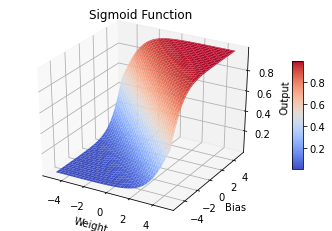

In [2]:
# span the weight and bias
min = -5.0
max = 5.1
step = 0.1
w = torch.arange(min, max, step)
b = torch.arange(min, max, step)
# Mesh the grid
W, B = torch.meshgrid([w, b],indexing= 'ij')
W.requires_grad = True
B.requires_grad = True

# span the input
x = torch.ones(B.shape)

# Output of the neuron, with weight and bias and go thorough sigmoid function
Z = W*x + B
Z_Sig = torch.sigmoid(Z)

########################### Q 1.1 Plot the required figures ################################
fig = plt.figure()
ax = fig.gca(projection = '3d')
# need to transfer tensor to numpy array to plot
surf = ax.plot_surface(W.detach().numpy(),B.detach().numpy(),Z_Sig.detach().numpy(),cmap = matplotlib.cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
ax.set_title("Sigmoid Function")
fig.colorbar(surf, shrink=0.5, aspect=10)

2. (3%) Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

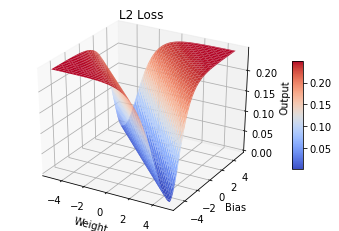

In [3]:
Y = 0.5*torch.ones(W.shape)
L2_loss = torch.pow((Z_Sig - Y),2)
########################### Q 1.2 Plot the required figures ################################
fig = plt.figure()
ax = fig.gca(projection = '3d')
# need to transfer tensor to numpy array to plot
surf = ax.plot_surface(W.detach().numpy(),B.detach().numpy(),L2_loss.detach().numpy(),cmap = matplotlib.cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
ax.set_title("L2 Loss")
fig.colorbar(surf, shrink=0.5, aspect=10)

3. (4%) Experiment with back-propagation with L2 loss. Compute $\frac{\partial }{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

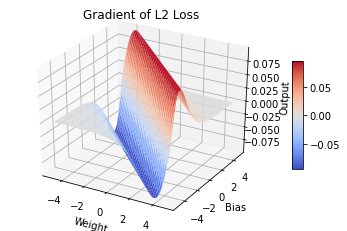

In [4]:
# When calculating gradient, first need to convey the loss into a scalar function
# torch.backward() enforces by default that the gradient that will be stored in X.grad shall be of the same shape as X. 
# If N_out>1, Pytorch wants to take a weighted sum over the N_out gradient masks.
# Giving every element of Y weight 1 is the same as using torch.sum(Y).backward().

L2_sum = L2_loss.sum()
L2_sum.backward()
########################### Q 1.3 Plot the required figures ################################
fig = plt.figure()
ax = fig.gca(projection = '3d')
# need to transfer tensor to numpy array to plot
surf = ax.plot_surface(W.detach().numpy(),B.detach().numpy(),W.grad.numpy(),cmap = matplotlib.cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
ax.set_title("Gradient of L2 Loss")
fig.colorbar(surf, shrink=0.5, aspect=10)

4. (3%) Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

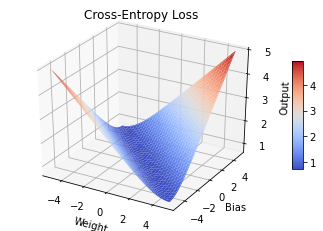

In [5]:
# span the weight and bias
min = -5.0
max = 5.1
step = 0.1
w = torch.arange(min, max, step)
b = torch.arange(min, max, step)
# Mesh the grid
W, B = torch.meshgrid([w, b],indexing= 'ij')
W.requires_grad = True
B.requires_grad = True

# span the input
x = torch.ones(B.shape)

# Output of the neuron, with weight and bias and go thorough sigmoid function
Z = W*x + B
Z_Sig = torch.sigmoid(Z)
Y = 0.5*torch.ones(W.shape)

CE_loss = -(Y * torch.log(Z_Sig) + (1-Y) * torch.log(1-Z_Sig))
########################### Q 1.4 Plot the required figures ################################
fig = plt.figure()
ax = fig.gca(projection = '3d')
# need to transfer tensor to numpy array to plot
surf = ax.plot_surface(W.detach().numpy(),B.detach().numpy(),CE_loss.detach().numpy(),cmap = matplotlib.cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
ax.set_title("Cross-Entropy Loss")
fig.colorbar(surf, shrink=0.5, aspect=10)

5. (4%) Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

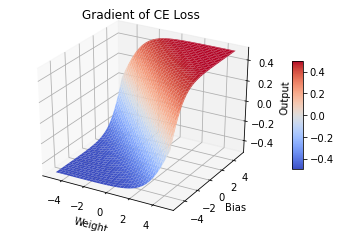

In [6]:
CE_sum = CE_loss.sum()
CE_sum.backward()
########################### Q 1.5 Plot the required figures ################################
fig = plt.figure()
ax = fig.gca(projection = '3d')
# need to transfer tensor to numpy array to plot
surf = ax.plot_surface(W.detach().numpy(),B.detach().numpy(),W.grad.numpy(),cmap = matplotlib.cm.coolwarm)
ax.set_xlabel("Weight")
ax.set_ylabel("Bias")
ax.set_zlabel("Output")
ax.set_title("Gradient of CE Loss")
fig.colorbar(surf, shrink=0.5, aspect=10)

6. (3%) Explain what you observed from the above 5 plots. The explanation should include: 
 1. What's the difference between cross-entropy loss and L2 loss?
 2. What's the difference between the gradients from cross-entropy loss and L2 loss?
 3. Predict how these differences will influence the efficiency of learning.

1. From the $z$ coordinate of Figure 2 and Figure 4, we can see that with the same weight $w$ and bias $b$, $\mathcal{L}_{L2}$ is much smaller than $\mathcal{L}_{CE}$. Moreover, we can see that $\mathcal{L}_{CE}$ keeps growing with the increase of absolute value of $w$ and bias $b$, while there is some "flat" region in the plot of $\mathcal{L}_{L2}$, indicating that when $w$ and bias $b$ reach certain threshold, the loss could hardly keep growing.

2. From Figure 3 and Figure 5, we can conclude that the gradient of $\mathcal{L}_{CE}$ with respect to weight $w$ is much larger than that of $\mathcal{L}_{L2}$. Meanwhile, the gradient of $\mathcal{L}_{L2}$ is almost zero when the weight and bias are large, which again explains the observation stated above and may cause the learning to process very slow at the very start when the output is far. By comparing, the gradient of $\mathcal{L}_{CE}$ don't have such issues.  

3. As is mentioned above, the gradient of $\mathcal{L}_{CE}$ is larger than that of $\mathcal{L}_{L2}$. When weight $w$ and bias $b$ is far from orgin, the gradient of $\mathcal{L}_{CE}$ remains larger while the gradient of $\mathcal{L}_{L2}$ is almost zero. Therefore, we can judge that $\mathcal{L}_{CE}$ can have better performance in achieving higher efficiency of learning

## Solving XOR with a 2-layer Perceptron (20%)
In this question you are asked to build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

The optimization probelm is formulated as below:  

$\min \ \mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$  
$=-(\sigma(\hat{y}) \log{\hat{y}} + (1 - \sigma(\hat{y}))\log{(1 - \hat{y})})$

s.t. $\hat{y} = b^{(1)} + W_1^{(1)}\tanh(\hat{h_1}) + W_2^{(1)}\tanh(\hat{h_2})$  

$\hat{h_1} = b_{1}^{(0)} + W_{11}^{(0)}x_1 + W_{12}^{(0)}x_2$  
$\hat{h_2} = b_{2}^{(0)} + W_{21}^{(0)}x_1 + W_{22}^{(0)}x_2$

Note: Here $x_1,x_2$ means the two coordinates of a single data $x$, i.e. $x=(x_1,x_2)$

2. (10%) Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane. 

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

tensor([[0.0048],
        [0.0042],
        [0.9914],
        [0.9915]], grad_fn=<SigmoidBackward0>)


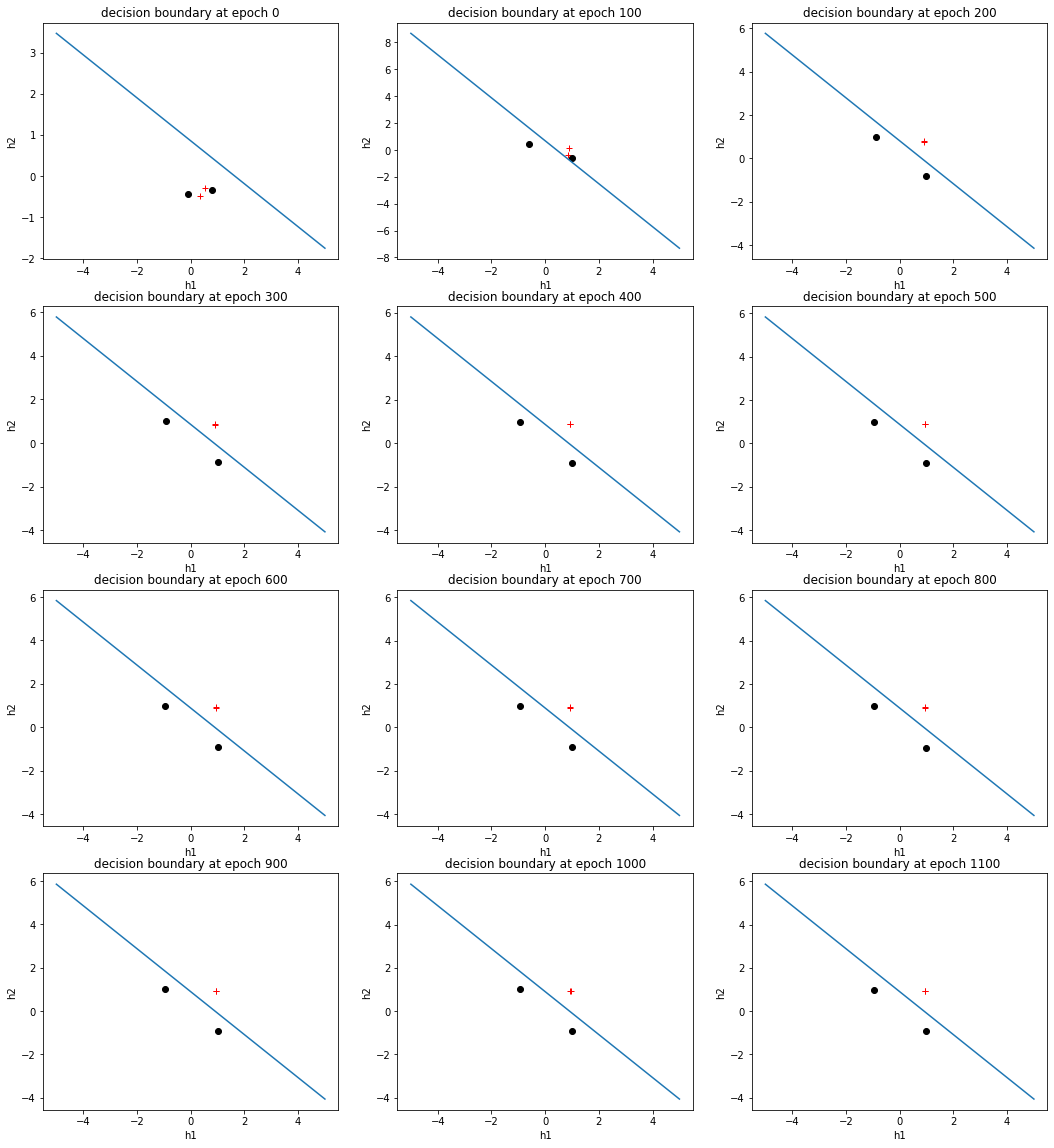

In [13]:
# Make your dataset here
data = torch.Tensor([[0,0],[1,1],[0,1],[1,0]])
labels = torch.Tensor([[0],[0],[1],[1]])

# Make your network here
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
#    self.l1 = nn.Linear(2,2,bias=false)
#    self.l2 = nn.Linear(2,1,bias=false)
    self.l1 = nn.Linear(2,2)
    self.l2 = nn.Linear(2,1)

  def forward(self,x):
    h = torch.tanh(self.l1(x))
    output = torch.sigmoid(self.l2(h))
    return h,output

# Train and plot here
# Create a net and assign the optimizer, Loss function, and other hyper parameters
# Note: since it's a binary classification and we use sigmoid, the loss function is better to be BCEloss
net = Net()
LR = 0.5
optimizer = torch.optim.SGD(net.parameters(),lr=LR)
Loss = nn.BCELoss()
cnt = 0
num_epoch = 1101
check_point = 100 # plot 12 figures
for epoch in range (num_epoch):
  optimizer.zero_grad() # clear the gradient
  h_output, output = net(data)
  if epoch % check_point == 0:
    cnt = cnt + 1
    h= h_output.detach().numpy()
    w_hidden = net.l2.weight.detach().numpy()
    w1_hidden = w_hidden[0][0]
    w2_hidden = w_hidden[0][1]
    b_hidden = net.l2.bias.detach().numpy()
    ########################### Q 2.2 Plot the required figures ################################
    fig = plt.gcf()
    fig.set_size_inches(18,20)
    fig = plt.subplot(4, 3, cnt)
    # plot the points mapping to h
    # [0,0] and [1,1] 
    plt.plot(h[0,0], h[0,1], '+', color = 'red')
    plt.plot(h[1,0], h[1,1], '+', color = 'red')
    # [0,1] and [1,0] 
    plt.plot(h[2,0], h[2,1], 'o', color = 'black')
    plt.plot(h[3,0], h[3,1], 'o', color = 'black')
    # plot the decision boundary in h-space , let h1 be horizontal axis
    h1 = np.linspace(-5, 5, 100)
    h2 = -w1_hidden/w2_hidden*h1 - b_hidden/w2_hidden
    plt.plot(h1, h2)
    plt.xlabel('h1')
    plt.ylabel('h2') 
    plt.title('decision boundary at epoch ' + str(epoch))
  loss = Loss(output,labels)
  loss.backward()
  optimizer.step()

# Print the final output to see that the net really learns the XOR
h ,y_hat= net(data)
print(y_hat)

3. (5%) What will happen if we don't use an activation function in the hidden layer? Is
the network be able to learn the XOR function? Justify your answer.

If we don't use an activation function, then the network can not learn the XOR function.  
The reason is that if there is no activation function in the hidden layer, then the hidden layer, together with the fisrt layer would act as a single-layer linear function. However, the XOR function is not linearly separable. Therefore, we need nonlinear activation functions like hyperbolic tangent function to introduce nonlinearity into this perceptron so as to learn a XOR function.

## Train a Convolutional Neural Network (30%)
In this part you will be asked to train a convolutional neural network on the MNIST
dataset.

1. (10%) Build a Convolutional Neural Network with architecture as shown below:

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [8]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Create your network here (do not change this name)
class DigitClassification(torch.nn.Module):
    def __init__(self):
      super(DigitClassification,self).__init__()
      # Conv. and Pool. Layer 1
      # Conv1 Input: 28*28*1, Kernel: 5*5*32 
        # Padding 'same': means the output has the same size with input. Padding size: 5//2=2 (or floor(5/2))
        # Output: 28*28*32, i.e. floor((W-K+2P)/S)+1 and floor((H-K+2P)/S)+1
      # Pool1 Input: 28*28*32, Kernel: 2*2, Stride: 2, Output: 14*14*32
      self.layer1 = nn.Sequential()
      self.layer1.add_module("Conv1", nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding='same'))
      self.layer1.add_module("BN1", nn.BatchNorm2d(num_features=32))
      self.layer1.add_module("ReLu1", nn.ReLU())
      self.layer1.add_module("Pool1",nn.AvgPool2d(kernel_size=2, stride=2, padding=0))

      # Conv. and Pool Layer 2
      # Conv2 Input: 14*14*32, Kernel: 5*5*32, Padding "same", Ouput: 14*14*32
      # Pool2 Input: 14*14*32, Kernel: 2*2, Stride: 2, Output: 7*7*32
      self.layer2 = nn.Sequential()
      self.layer2.add_module("Conv2", nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding='same'))
      self.layer2.add_module("BN2", nn.BatchNorm2d(num_features=32))
      self.layer2.add_module("ReLu2", nn.ReLU())
      self.layer2.add_module("Pool2",nn.AvgPool2d(kernel_size=2, stride=2, padding=0))

      # Conv. and Pool Layer 3
      # Conv3 Input: 7*7*32, Kernel: 5*5*64, Padding "same", Ouput: 7*7*64
      # Pool3 Input: 7*7*64, Kernel: 2*2, Stride: 2, Output: 3*3*64
      self.layer3 = nn.Sequential()
      self.layer3.add_module("Conv3", nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding='same'))
      self.layer3.add_module("BN3", nn.BatchNorm2d(num_features=64))
      self.layer3.add_module("ReLu3", nn.ReLU())
      self.layer3.add_module("Pool3",nn.AvgPool2d(kernel_size=2, stride=2, padding=0))

      # Fully Connected 1
      # Input: 3*3*64, Ouput: 64
      self.fullycon1 = nn.Sequential()
      self.fullycon1.add_module("FC1", nn.Linear(in_features=3 * 3 * 64, out_features=64))
      self.fullycon1.add_module("FC1BN", nn.BatchNorm1d(num_features=64))
      self.fullycon1.add_module("FC1ReLu", nn.ReLU())

      # Fully Connected 2
      # Input: 64, Ouput: 10
      self.fullycon2 = nn.Sequential()
      self.fullycon2.add_module("FC2", nn.Linear(in_features=64, out_features=10))
      self.fullycon2.add_module("Softmax", nn.Softmax(dim=1))
        
    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = self.layer3(x)
      x = x.view (-1, 3 * 3 * 64)
      x = self.fullycon1(x)
      x = self.fullycon2(x)
      return x

# Instantiate your network here
Net = DigitClassification().to(device)

2. (15%) Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam
optimizer).

In [9]:

# Load and normalize the images, as is mentioned, we should normalize the image to (-1, 1)
# Setps for train and test loaders

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))])

train_batch_size = 32
test_batch_size = 64
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform),
    batch_size=train_batch_size, shuffle=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform),
    batch_size=test_batch_size, shuffle=True, num_workers=8)

# Define tranning and testing process

def train(Net, device, train_loader, optimizer, criterion, epoch, display_interval):
  Net.train()
  running_loss = 0
  running_correct = 0
  for batch_index, (inputs, labels) in enumerate(train_loader):
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()   # remember to clear the gradients
    outputs = Net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    running_loss += loss.item() * inputs.size(0)
    optimizer.step()
    pred_outputs = torch.max(outputs.data, dim=1)[1] # get the prediction
    running_correct += (pred_outputs == labels).sum()
    # Print the training process
    if batch_index % display_interval == 0:
       print('Train Epoch : {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
          epoch+1, batch_index*len(inputs), len(train_loader.dataset), 100.*batch_index / len(train_loader),
          loss.item(), float(running_correct*100) / float(train_batch_size*(batch_index + 1))))
  epoch_loss = running_loss / len(train_loader.dataset)
  epoch_accu = (running_correct) / len(train_loader.dataset)
  train_loss.append(epoch_loss)
  train_accu.append(epoch_accu)
  print('\nTrain set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(train_loader.dataset),
        100. * epoch_accu))

def test(Net, device, test_loader, criterion, epoch):
  Net.eval()
  running_loss = 0
  running_correct = 0
  with torch.no_grad(): # we don't need BP for testing
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)
      outputs = Net(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item() * inputs.size(0)
      pred_outputs = torch.max(outputs.data, dim=1)[1]
      running_correct += (pred_outputs == labels).sum()
  
  epoch_loss =  running_loss / len(test_loader.dataset)
  epoch_accu = (running_correct) / len(test_loader.dataset)
  test_loss.append(epoch_loss)
  test_accu.append(epoch_accu)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        epoch_loss, running_correct, len(test_loader.dataset),
        100. * epoch_accu))




# Train your network here
# criterion (loss function) would be cross entropy, optimzer is Adam
LR = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Net.parameters(),lr=LR)
display_interval = 100
train_loss = []
train_accu = []
test_loss = []
test_accu = []

# Net, device, train_loader has been setup before
num_epochs = 10
for epoch in range(num_epochs):
  train(Net=Net, device=device, train_loader=train_loader, optimizer=optimizer, criterion=criterion, epoch=epoch, display_interval=display_interval)
  test(Net=Net, device=device, test_loader=test_loader, criterion=criterion, epoch=epoch)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Epoch : 1 [0/60000 (0%)]	Loss: 2.304867	 Accuracy:6.250%
Train Epoch : 1 [3200/60000 (5%)]	Loss: 1.604503	 Accuracy:84.963%
Train Epoch : 1 [6400/60000 (11%)]	Loss: 1.482868	 Accuracy:90.920%
Train Epoch : 1 [9600/60000 (16%)]	Loss: 1.483559	 Accuracy:93.034%
Train Epoch : 1 [12800/60000 (21%)]	Loss: 1.477742	 Accuracy:94.007%
Train Epoch : 1 [16000/60000 (27%)]	Loss: 1.509589	 Accuracy:94.673%
Train Epoch : 1 [19200/60000 (32%)]	Loss: 1.467330	 Accuracy:95.149%
Train Epoch : 1 [22400/60000 (37%)]	Loss: 1.512873	 Accuracy:95.506%
Train Epoch : 1 [25600/60000 (43%)]	Loss: 1.472723	 Accuracy:95.814%
Train Epoch : 1 [28800/60000 (48%)]	Loss: 1.511325	 Accuracy:96.084%
Train Epoch : 1 [32000/60000 (53%)]	Loss: 1.497192	 Accuracy:96.294%
Train Epoch : 1 [35200/60000 (59%)]	Loss: 1.483518	 Accuracy:96.489%
Train Epoch : 1 [38400/60000 (64%)]	Loss: 1.495835	 Accuracy:96.620%
Train Epoch : 1 [41600/60000 (69%)]	Loss: 1.494443	 Accuracy:96.769%
Train Epoch : 1 [44800/60000 (75%)]	Loss: 1.

In [10]:
# Where your trained model will be saved (and where the autograder will load it)
model_path = 'model.pth'
torch.save(Net.state_dict(), 'model.pth')

3. (5%) Report the training and testing curves and briefly summarise your implementation and training. Some things you may considering discussing, if appropriate:
 * Summarize your selection of hyperparameters.
 * Describe any issues or challenges you had with your implementation.
 * Note any interesting observations you made. 
 * Justify any modifications or additions to the suggested architecture.
 * Do you think that the model overfit, underfit, or neither?
 
 You do not need to include all of these points and are free to discuss anything else you deem relevant.

Text(0.5, 1.0, 'Training and Testing curves (Accuracy)')

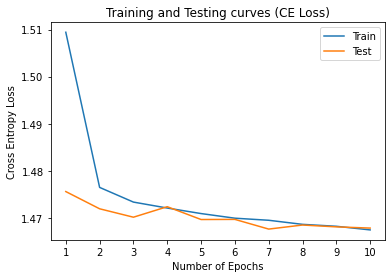

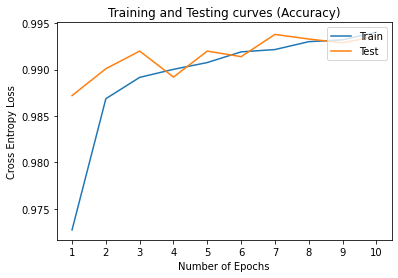

In [11]:
# Firstly, plot the curves (CE Loss & Accuracy)
fig = plt.figure()
plt.plot(np.arange(1, num_epochs+1), np.array(train_loss))
plt.plot(np.arange(1, num_epochs+1), np.array(test_loss))
plt.legend(['Train','Test'],loc= 'upper right')
plt.xlabel('Number of Epochs')
plt.xticks(range(1,num_epochs + 1))
plt.ylabel('Cross Entropy Loss')
plt.title('Training and Testing curves (CE Loss)')

fig = plt.figure()
plt.plot(np.arange(1, num_epochs+1), np.array(train_accu))
plt.plot(np.arange(1, num_epochs+1), np.array(test_accu))
plt.legend(['Train','Test'],loc= 'upper right')
plt.xlabel('Number of Epochs')
plt.xticks(range(1,num_epochs + 1))
plt.ylabel('Cross Entropy Loss')
plt.title('Training and Testing curves (Accuracy)')


**Summurization of MNIST Classification Problem**


1. Hyperparameters selection:  
For the kernel sizes, paddings, and strides stuffs, I just followed the requirement posted above and it turned out that this network structure is quite good. Therefore, I didn't modify any of them. As for other parameters like learning rate and batch numbers etc., they mostly referred to the Pytorch official tutorial and document examples.
2. Isues or challenges in implementation.  
For the network architecture, it is quite easy to build as Pytorch have that nn.Sequential() class, Autograd engine and backward() function. The calculations and checking of input/output sizes took some time and may lead to fatal error in the codes, but they were all easy to solve (just being more careful or simply print the output for each layer to check). I believe the most challenging part for me is to code the whole training and testing process. I have used Pytorch previously, but not often, so I am still not familiar with it. Therefore, the process of loading training sets, defining the forward path, calculating the loss and accuracy and making the whole code to run without any warning ot error really took time. Thanks to the documentations and tutorials online, I followed them and is now gradually finding my way around
3. Overfit or Underfit Issues  
As is plotted above, the training curve looks quite typical, and the performance on the testing is also following a regular pattern and reached the rquired 99% accuracy (with just a little noise-like trend). Therefore, I think the result is neither underfit nor overfit, or just a little bit overfit, which really doesn't matter.





## Submission

Make sure you have run all cells in your notebook in order before you zip together your submission, so that all images/graphs appear in the output. 

Your submission should include two files: this notebook and your trained model weights.

**Please save before exporting!**